# Airbnb Rio de Janeiro
## listings

dataset: http://insideairbnb.com/get-the-data.html

In [26]:
import pandas as pd
import json

from keplergl import KeplerGl 

In [2]:
df_listings = pd.read_csv("data/listings.csv", low_memory=False)
print("Data Shape:", df_listings.shape)
df_listings.head()

Data Shape: (35793, 106)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20200524171540,2020-05-25,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. Please contact ...,"- Beautiful, sunny 2 bedroom (90 square meters...",Discounts for long term stays. Please contact ...,none,This is the one of the bests spots in Rio. Bec...,...,t,f,moderate,f,f,1,1,0,0,2.09
1,21280,https://www.airbnb.com/rooms/21280,20200524171540,2020-05-25,Renovated Modern Apt. Near Beach,Immaculately renovated top-floor apartment ove...,Immaculately renovated top-floor apartment in ...,Immaculately renovated top-floor apartment ove...,none,This is the best neighborhood in Zona Sul. Fo...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.23
2,25026,https://www.airbnb.com/rooms/25026,20200524171540,2020-05-25,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,f,f,strict_14_with_grace_period,t,t,3,3,0,0,1.96
3,31560,https://www.airbnb.com/rooms/31560,20200524171540,2020-05-25,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.35
4,35636,https://www.airbnb.com/rooms/35636,20200524171540,2020-05-26,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,"The location is extremely convenient, safe and...",This cosy apartment is just a few steps away ...,none,The apartment street is very quiet and safe ....,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,2.25


# EDA
## Checando colunas e seus tipos

In [3]:
for idx, dtype in zip(df_listings.dtypes.index, df_listings.dtypes):
    print("name:", idx)
    print("type:", dtype)

name: id
type: int64
name: listing_url
type: object
name: scrape_id
type: int64
name: last_scraped
type: object
name: name
type: object
name: summary
type: object
name: space
type: object
name: description
type: object
name: experiences_offered
type: object
name: neighborhood_overview
type: object
name: notes
type: object
name: transit
type: object
name: access
type: object
name: interaction
type: object
name: house_rules
type: object
name: thumbnail_url
type: float64
name: medium_url
type: float64
name: picture_url
type: object
name: xl_picture_url
type: float64
name: host_id
type: int64
name: host_url
type: object
name: host_name
type: object
name: host_since
type: object
name: host_location
type: object
name: host_about
type: object
name: host_response_time
type: object
name: host_response_rate
type: object
name: host_acceptance_rate
type: object
name: host_is_superhost
type: object
name: host_thumbnail_url
type: object
name: host_picture_url
type: object
name: host_neighbourhood
ty

In [4]:
df_listings.describe().T

,count,mean,std,min,25%,50%,75%,max
id,35793.0,2.129684e+07,1.368508e+07,1.787800e+04,1.098687e+07,1.704652e+07,3.428384e+07,4.352478e+07
scrape_id,35793.0,2.020052e+13,1.023452e+01,2.020052e+13,2.020052e+13,2.020052e+13,2.020052e+13,2.020052e+13
thumbnail_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medium_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xl_picture_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,35793.0,8.492397e+07,8.916201e+07,1.173900e+04,1.508375e+07,5.640055e+07,1.118898e+08,3.468845e+08
host_listings_count,35788.0,1.868129e+01,1.322389e+02,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.379000e+03
host_total_listings_count,35788.0,1.868129e+01,1.322389e+02,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.379000e+03
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,35793.0,-2.296522e+01,3.488945e-02,-2.307340e+01,-2.298456e+01,-2.297066e+01,-2.294693e+01,-2.275038e+01


### Selecionando algumas colunas mais relevantes arbitrariamente antes de continuar

In [62]:
df_listings = df_listings[['']]

KeyError: "None of [Index([''], dtype='object')] are in the [columns]"

In [61]:
df_listings.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               58
summary                                          2577
space                                           14174
description                                      1426
experiences_offered                                 0
neighborhood_overview                           15776
notes                                           24169
transit                                         15971
access                                          19609
interaction                                     18242
house_rules                                     17342
thumbnail_url                                   35793
medium_url                                      35793
picture_url                                         0
xl_picture_url              

## preprocessa

In [11]:
df_listings['price'] = df_listings.price.str.replace('$','')
df_listings['price'] = df_listings.price.str.replace(',','')
df_listings.price = pd.to_numeric(df_listings.price)

## Visualiza distribuição espacial

In [37]:
with open('mapconfig.json') as json_file:
    map_config = json.load(json_file)

In [38]:
map_1 = KeplerGl(height=500, config=map_config)
map_1.add_data(data=df_listings, name="data_1")

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


## Valor por região

Cor dos hexágonos = valor médio da diária na região

In [39]:
map_1

KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': '6cu8gy', 'type': '…

## Checa distribuição por vizinhanças

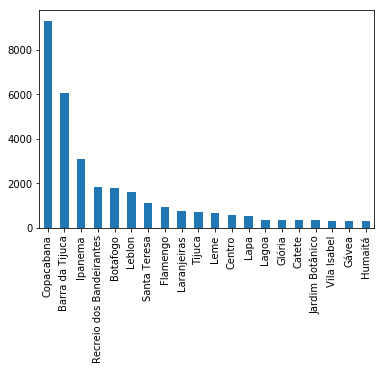

In [40]:
df_listings.neighbourhood.value_counts()[:20].plot.bar();

## Checa distribuição por tamanho e preço

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff240b73c88>,
      dtype=object)

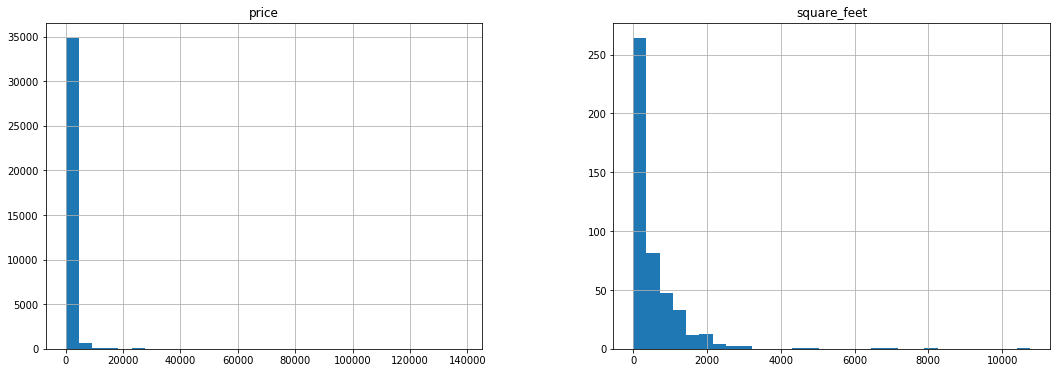

In [55]:
df_listings[['square_feet','price']].hist(bins=30,figsize=(18,6))

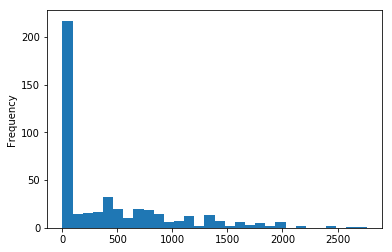

In [46]:
df_listings[df_listings.square_feet < 3000].square_feet.plot.hist(bins=30);

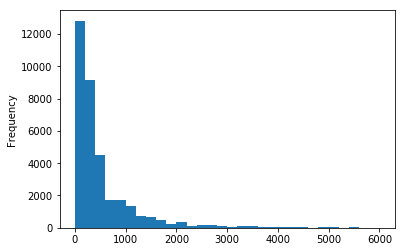

In [60]:
df_listings[df_listings.price < 6000].price.plot.hist(bins=30);